In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [8]:
import pandas as pd

# Define the date parser using pd.to_datetime
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m')

# Read the CSV file with the correct date parser
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], 
                   index_col='Month', date_parser=dateparse)

print('\nParsed Data:')
print(data.head())



Parsed Data:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


/tmp/ipykernel_19784/4196143974.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],


In [9]:
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
#Convert to timeseries
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [11]:
#Indexing time series arrays
ts['1949-01-01']

112

In [12]:
#Import datetime library and use 'datetime' function
from datetime import datetime
ts[datetime(1949,1,1)]

112

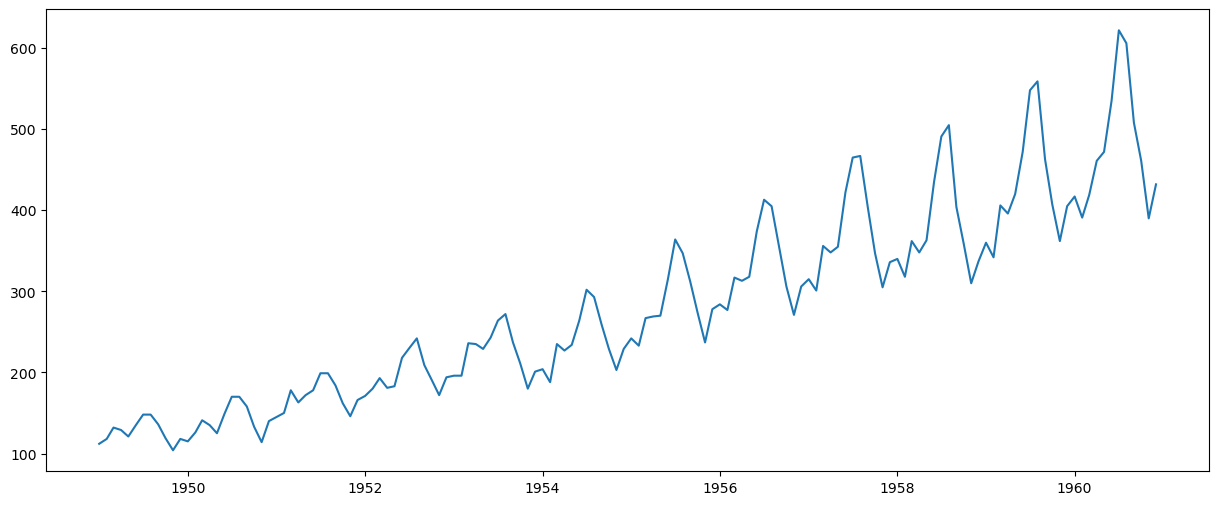

In [13]:
#GET RANGE
#PLOTTING THE TIME SERIES
plt.plot(ts)

In [14]:
from pandas import read_csv
#series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
X_new = data.values
split = len(X_new) / 2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


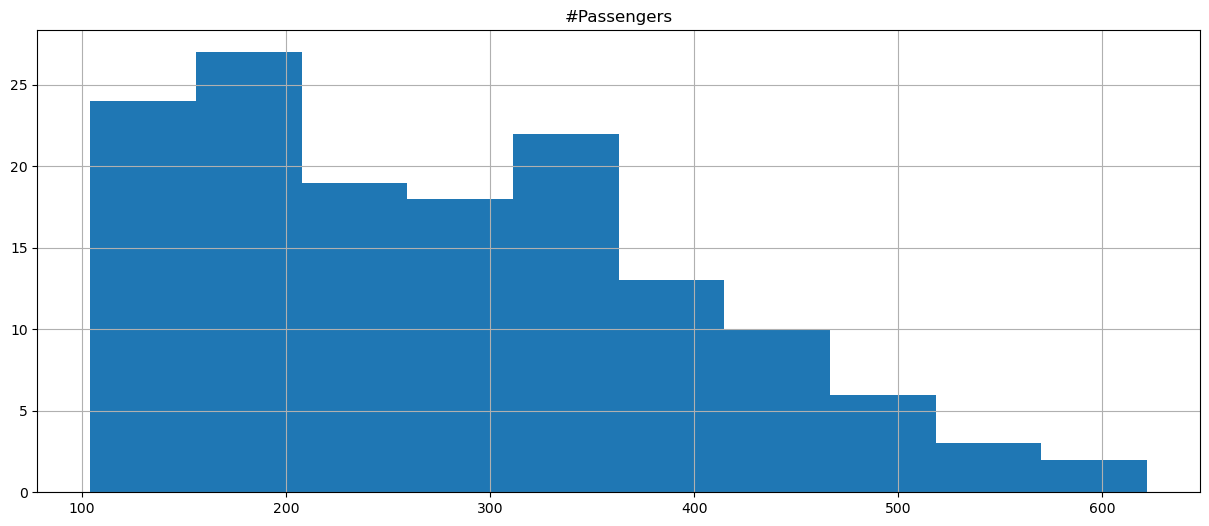

In [15]:
from pandas import read_csv
from matplotlib import pyplot
data.hist()
pyplot.show()

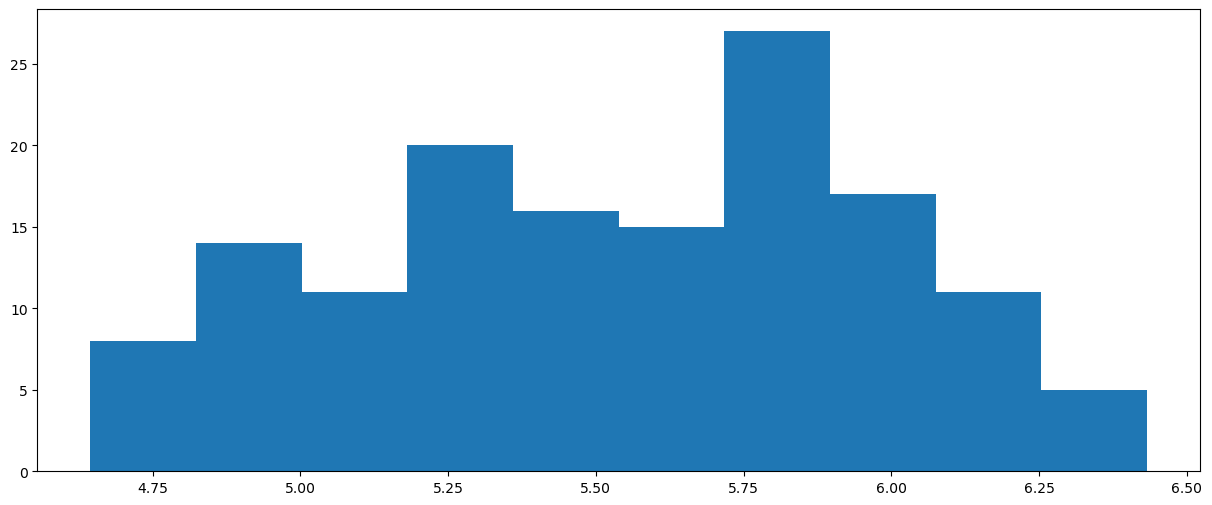

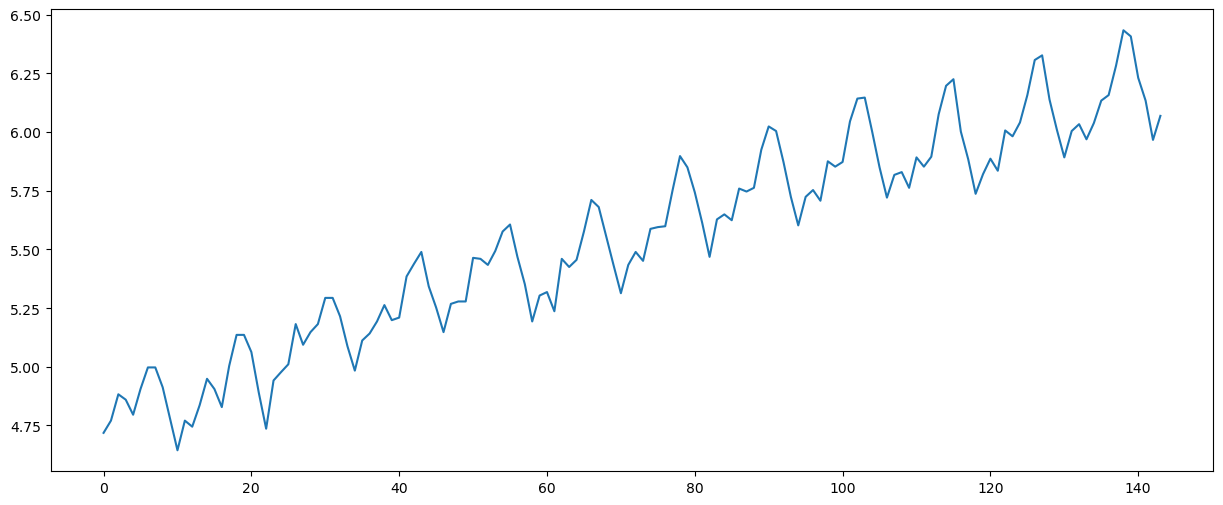

In [16]:
from numpy import log
X_log = log(data.values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

In [17]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.
X_new_log = data.values
X_new_log = log(X_new_log)
split_log = len(X_new_log) / 2
X1_log, X2_log = X_new_log[0:int(split_log)], X_new_log[int(split_log):]
mean1_log, mean2_log = X1_log.mean(), X2_log.mean()
var1_log, var2_log = X1_log.var(), X2_log.var()
print('mean1=%f, mean2=%f' % (mean1_log, mean2_log))
print('variance1=%f, variance2=%f' % (var1_log, var2_log))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

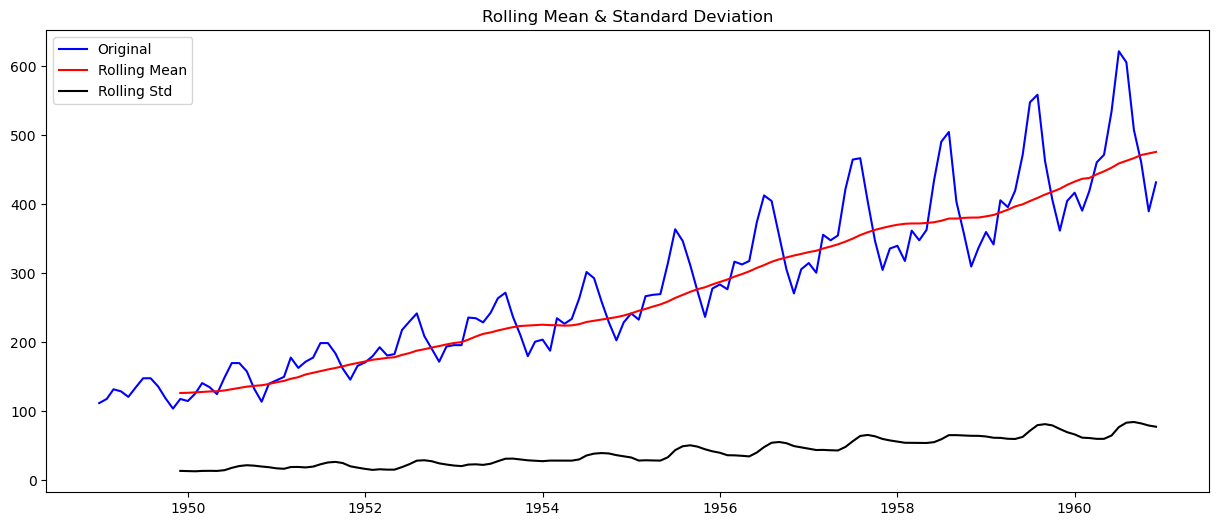

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
test_stationarity(ts)


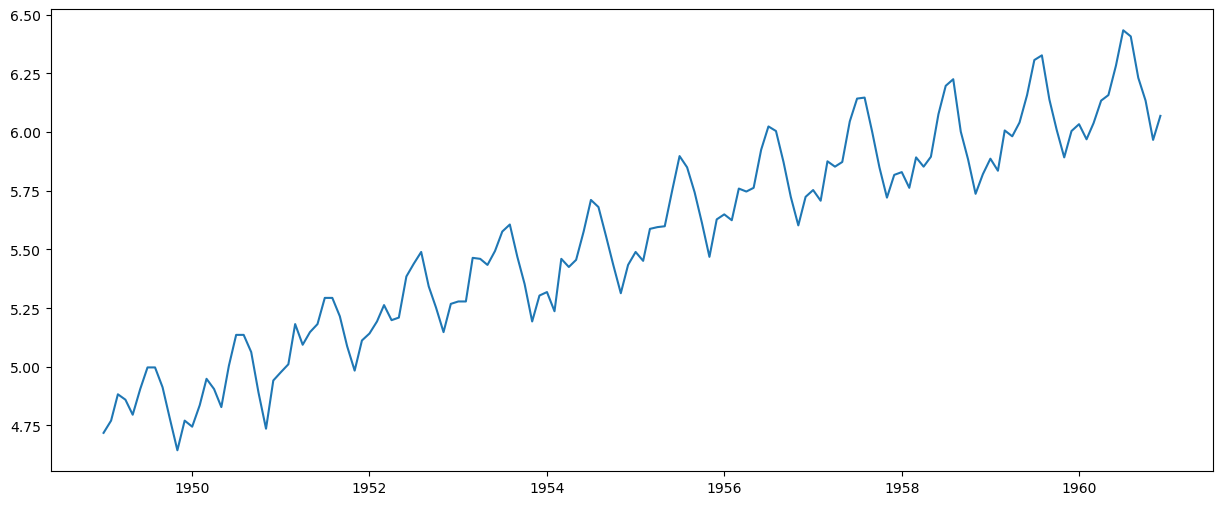

In [20]:
#MAKING TS STATIONARY

ts_log = np.log(ts)
plt.plot(ts_log)

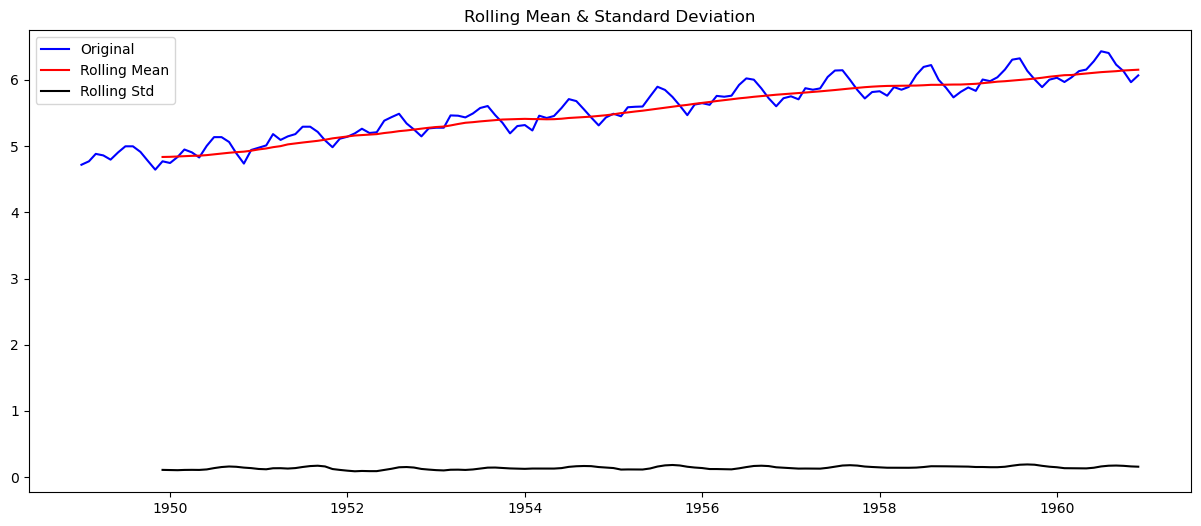

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [21]:
test_stationarity(ts_log)


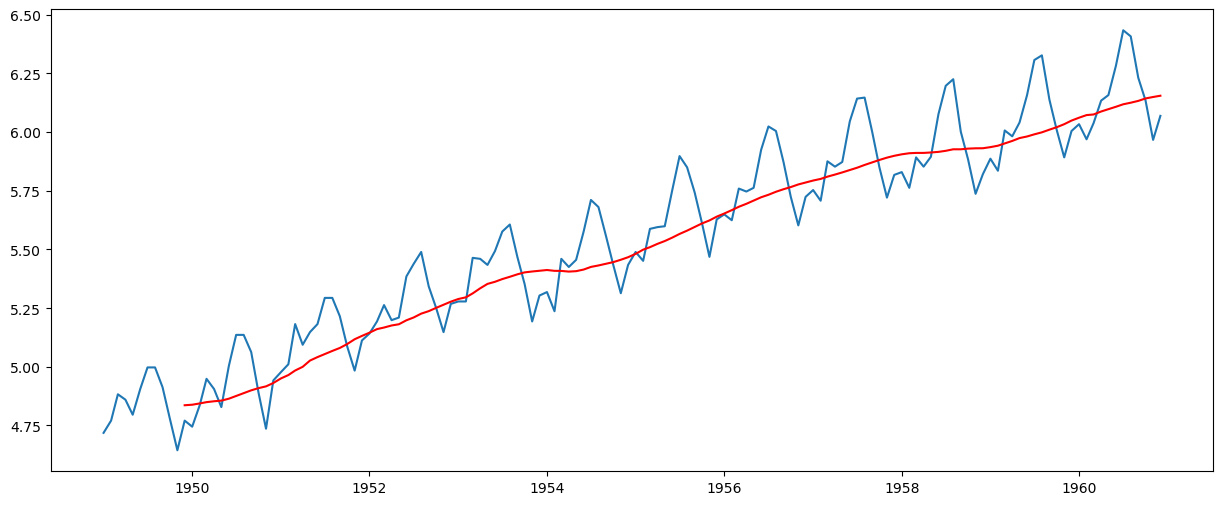

In [22]:
#Smoothing
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

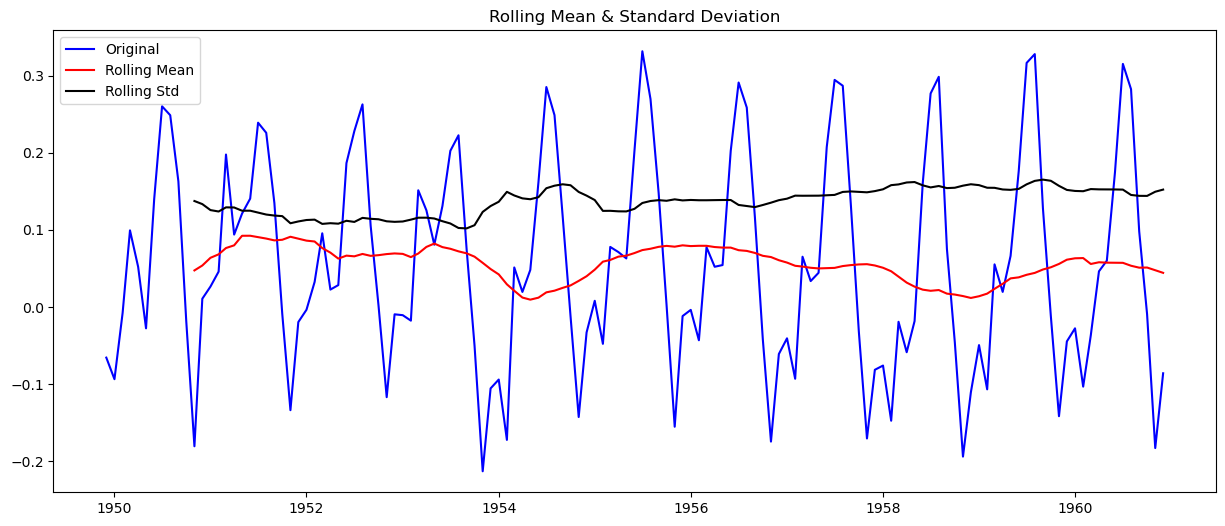

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [25]:

#TEST STATIONARITY AGAIN
test_stationarity(ts_log_moving_avg_diff)

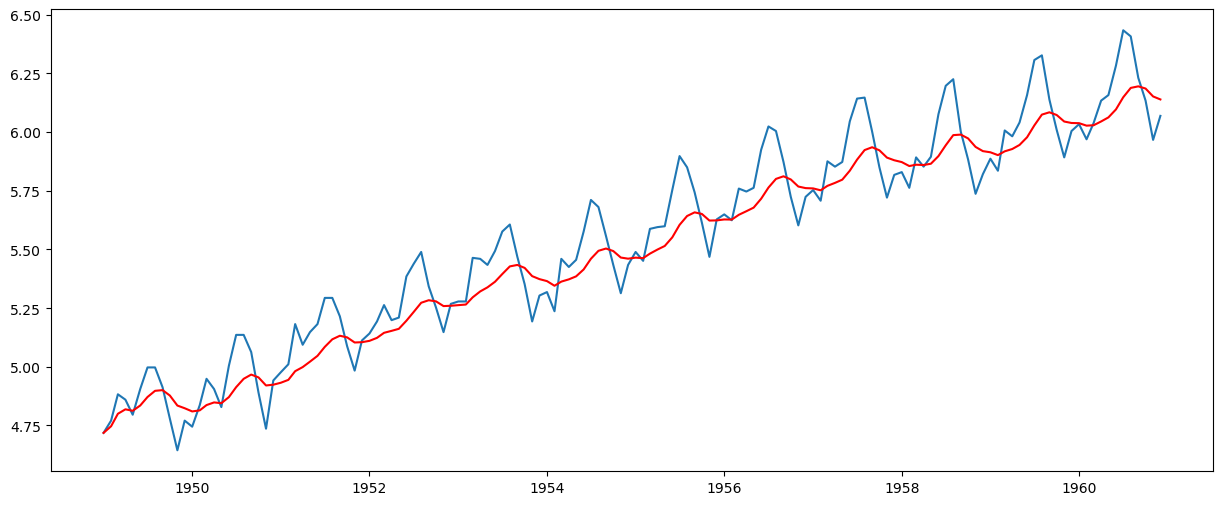

In [26]:

expwighted_avg = ts_log.ewm(span=12).mean() 
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

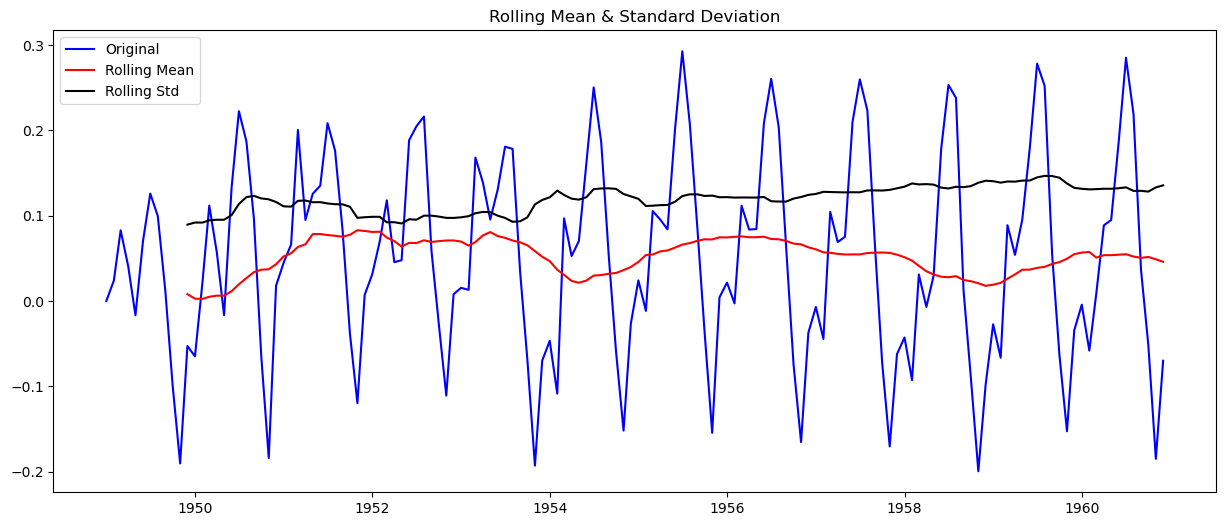

Results of Dickey-Fuller Test:
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [27]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

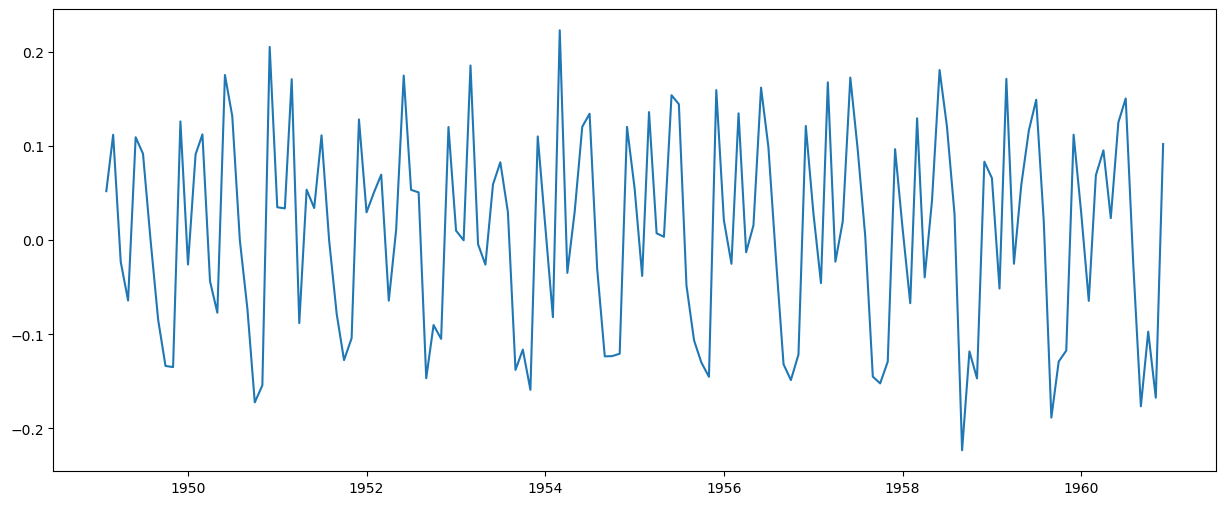

In [28]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

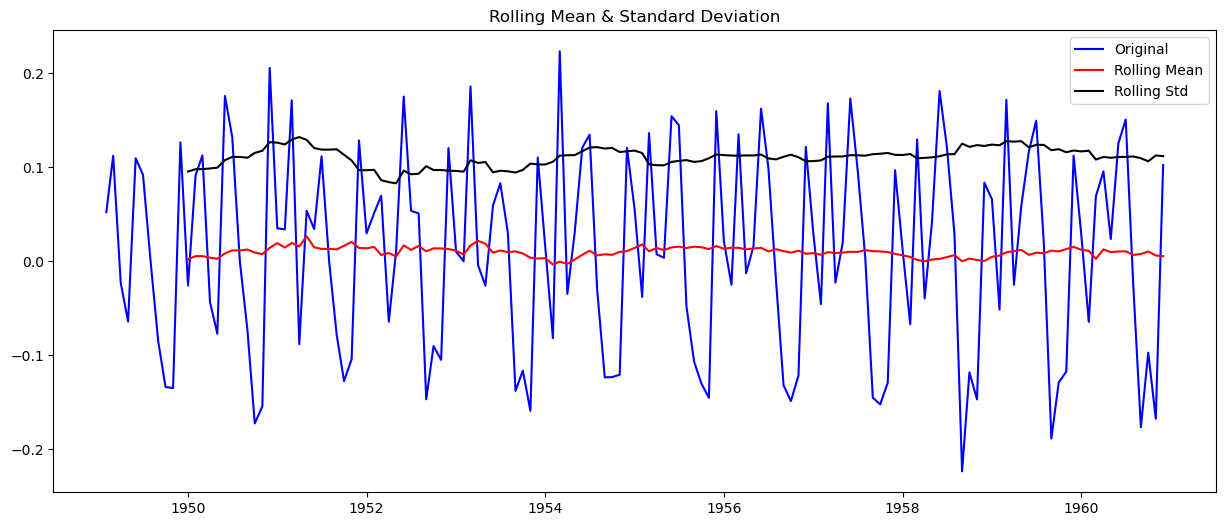

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [29]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [30]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [31]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

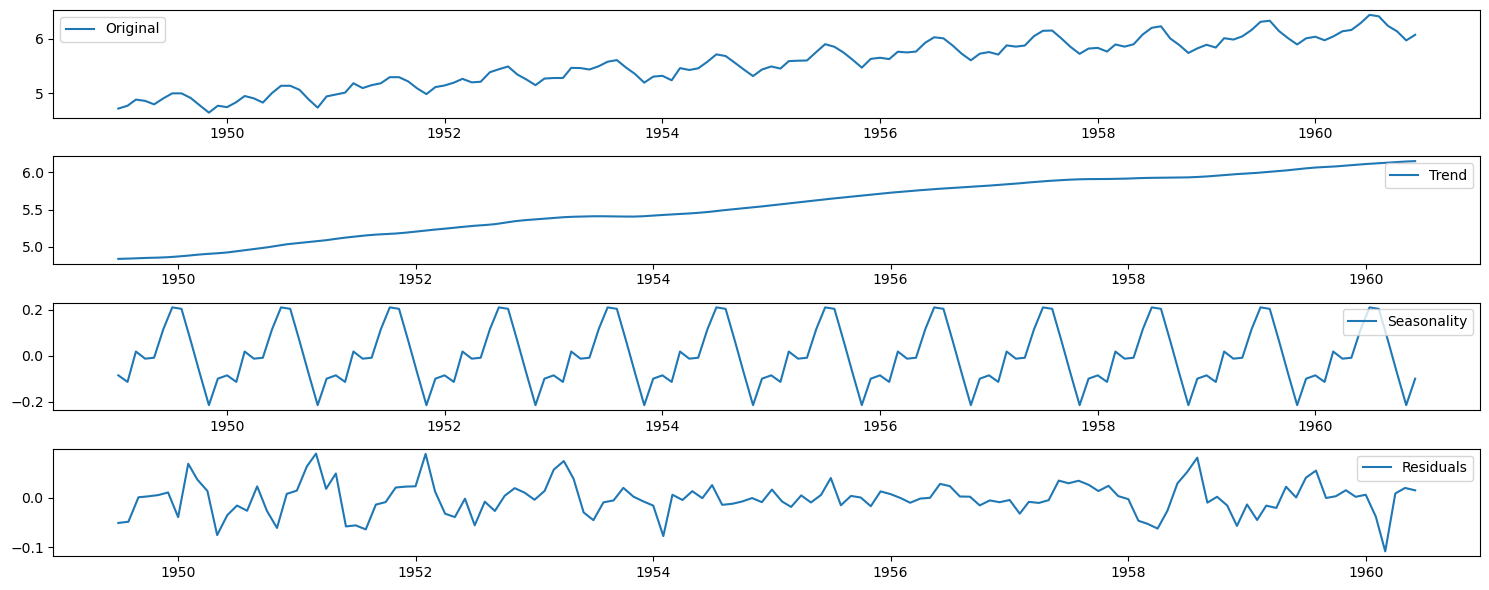

In [32]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

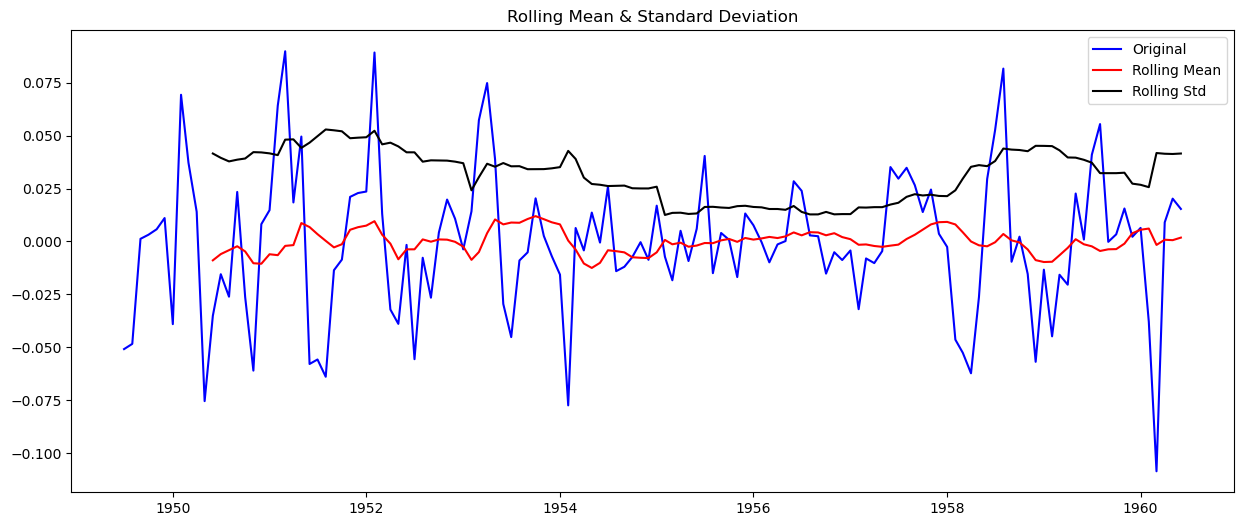

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [33]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [34]:
#FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA

In [35]:
#ACF/PACF PLOTS

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

In [36]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

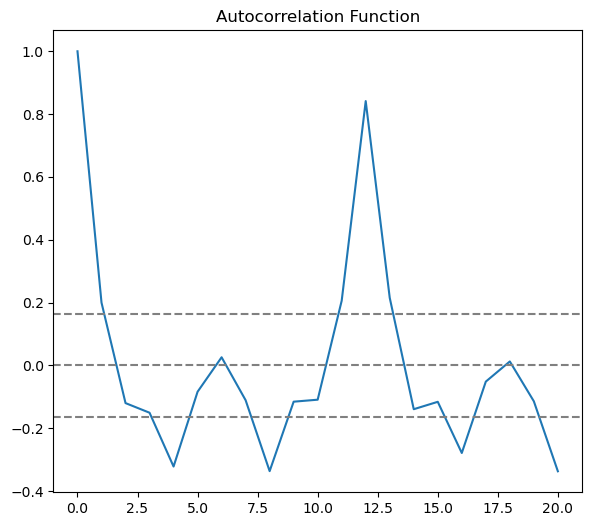

In [37]:
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

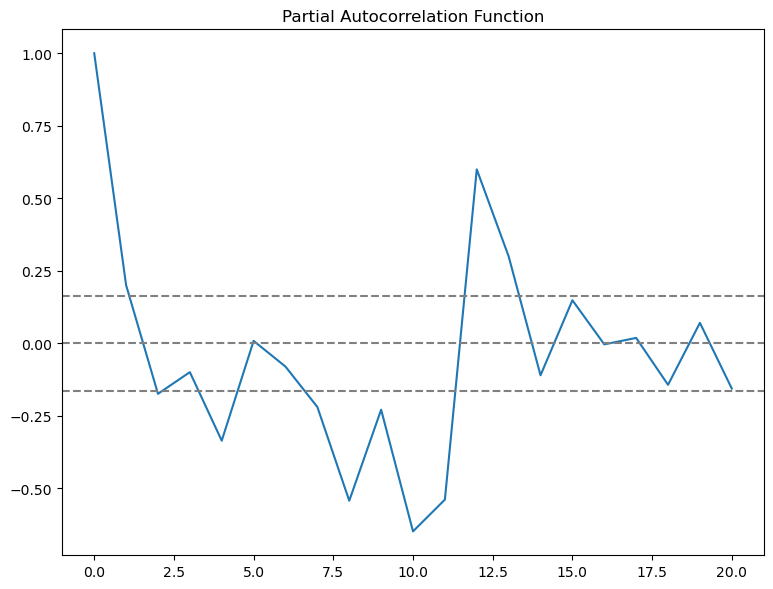

In [38]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [39]:
ts_values=ts_log.values


In [40]:
X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [41]:
#MODEL BUILDING
#training will be 66%, test will be 33% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [42]:
history = [x for x in train]
predictions = list()
#test.reset_index()

In [44]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming history and test are already defined
# Replace the loop with the correct ARIMA class

for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4, 1, 2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        history.append(test[t])
        print(f'Predicted={yhat}, Expected={test[t]}')
    except Exception as e:
        print(f'Error fitting ARIMA model: {e}')

Predicted=5.783705218865166, Expected=5.752572638825633
Predicted=5.7224563586786275, Expected=5.707110264748875
Predicted=5.731443667680725, Expected=5.87493073085203
Predicted=5.886967857906864, Expected=5.8522024797744745
Predicted=5.81589480158285, Expected=5.872117789475416
Predicted=5.929344671038727, Expected=6.045005314036012
Predicted=6.023583310592661, Expected=6.142037405587356
Predicted=6.162540507593461, Expected=6.1463292576688975
Predicted=6.17324197199012, Expected=6.0014148779611505
Predicted=5.896997213509534, Expected=5.849324779946859
Predicted=5.820923161016647, Expected=5.720311776607412
Predicted=5.774706515971602, Expected=5.817111159963204
Predicted=5.865335375793251, Expected=5.8289456176102075
Predicted=5.79251388676669, Expected=5.762051382780177
Predicted=5.7933397837755995, Expected=5.8916442118257715
Predicted=5.919756976453304, Expected=5.8522024797744745
Predicted=5.806425524258121, Expected=5.8944028342648505
Predicted=5.932287717153473, Expected=6.075

In [46]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

# Assuming history and test are already defined
history = list(train)  # Assuming you have a train list already defined
predictions = []

for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4, 1, 2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
        print(f'Predicted={yhat}, Expected={test[t]}')
    except Exception as e:
        print(f'Error fitting ARIMA model: {e}')

# Calculate RMSE
rms = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error: {rms}')


Predicted=5.783705218865166, Expected=5.752572638825633
Predicted=5.7224563586786275, Expected=5.707110264748875
Predicted=5.731443667680725, Expected=5.87493073085203
Predicted=5.886967857906864, Expected=5.8522024797744745
Predicted=5.81589480158285, Expected=5.872117789475416
Predicted=5.929344671038727, Expected=6.045005314036012
Predicted=6.023583310592661, Expected=6.142037405587356
Predicted=6.162540507593461, Expected=6.1463292576688975
Predicted=6.17324197199012, Expected=6.0014148779611505
Predicted=5.896997213509534, Expected=5.849324779946859
Predicted=5.820923161016647, Expected=5.720311776607412
Predicted=5.774706515971602, Expected=5.817111159963204
Predicted=5.865335375793251, Expected=5.8289456176102075
Predicted=5.79251388676669, Expected=5.762051382780177
Predicted=5.7933397837755995, Expected=5.8916442118257715
Predicted=5.919756976453304, Expected=5.8522024797744745
Predicted=5.806425524258121, Expected=5.8944028342648505
Predicted=5.932287717153473, Expected=6.075

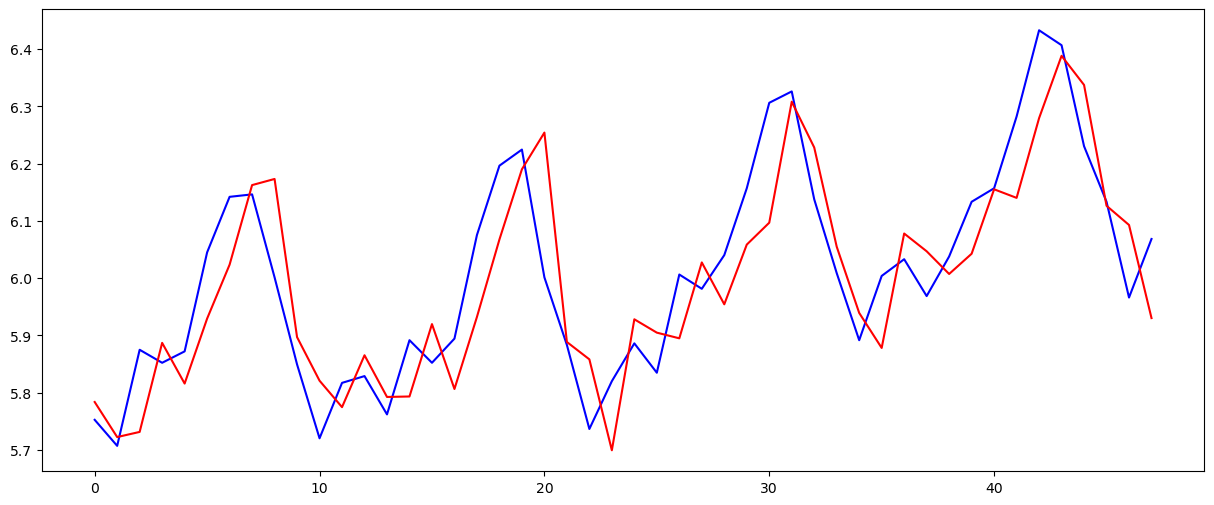

In [47]:
# plot
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

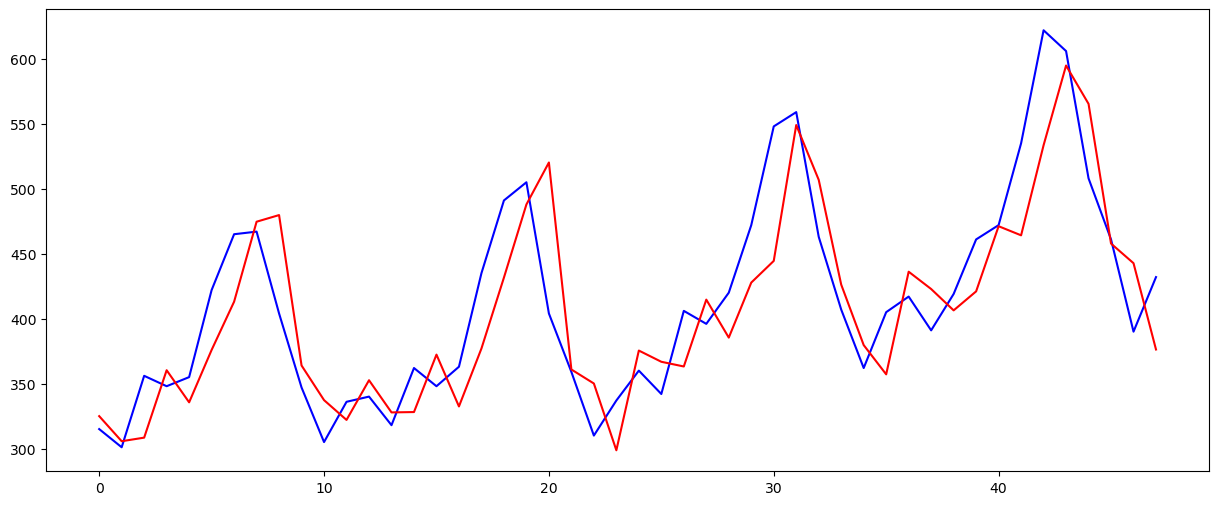

In [48]:
# plot
pyplot.plot(np.exp(test), color = 'blue', label='test')   
pyplot.plot(np.exp(predictions), color='red', label='pred')
pyplot.show()

In [49]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)

Mean Squarred Error: 43.05


In [51]:
# auto-arima
!pip install pmdarima
from pmdarima.arima import auto_arima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01


In [52]:
arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1, 
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1, 
                         seasonal=True, stationary=False, information_criterion='aic', 
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, 
                         n_jobs=1, start_params=None, trend=None, method='lbfgs', 
                         maxiter=50, offset_test_args=None, seasonal_test_args=None, 
                         suppress_warnings=True, error_action='trace', trace=False, 
                         random=False, random_state=None, n_fits=10, 
                         return_valid_fits=False, out_of_sample_size=0, 
                         scoring='mse', scoring_args=None, with_intercept='auto', 
                         sarimax_kwargs=None)

In [53]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  94.364
Date:                Sat, 18 May 2024   AIC                           -176.727
Time:                        17:53:52   BIC                           -161.404
Sample:                             0   HQIC                          -170.536
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0061      0.002      4.034      0.000       0.003       0.009
ar.L1          0.5402      0.291      1.853      0.064      -0.031       1.111
ar.L2         -0.0903      0.246     -0.367      0.713      -0.572       0.392
ma.L1         -0.6060      0.319     -1.900      0.057      -1.231       0.019
ma.L2         -0.3709      0.328     -1.131      0.258      -1.014       0.272
sigma2         0.0079      0.002      3.623      0.000       0.004       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 4.71
Prob(Q):                              0.85   Prob(JB):                         0.09
Heteroskedasticity (H):               0.97   Skew:                            -0.07
Prob(H) (two-sided):                  0.94   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=len(test)))
prediction_arima_model.columns = ['predicted_sales']

In [55]:
np.exp(prediction_arima_model)  


,predicted_sales
0,339.069773
1,350.113990
2,355.115887
3,359.010919
4,362.892073
5,366.892874
6,370.985445
7,375.142526
8,379.352087
9,383.610365


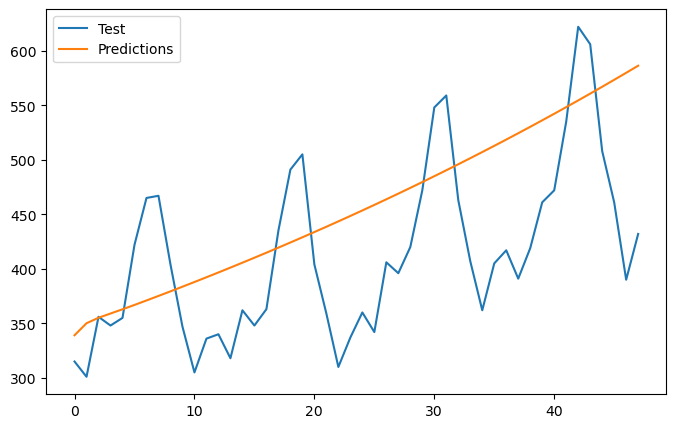

In [56]:
plt.figure(figsize=(8,5))
#plt.plot(train, label='Training')
plt.plot(np.exp(test), label='Test')
plt.plot(np.exp(prediction_arima_model), label='Predictions')
plt.legend(loc = 'upper left')
plt.show()

In [58]:
import warnings
from pandas import read_csv, to_datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [59]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.8)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error


In [60]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [61]:
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [62]:
import datetime
print(datetime.datetime.now())
p_values = [1,2,3,4,5]
d_values = [0,1]
q_values = [1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2024-05-18 18:04:23.971062
Best ARIMANone MSE=inf
2024-05-18 18:04:23.971720
